In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use("fivethirtyeight")

import warnings 
warnings.filterwarnings("ignore")

In [43]:
data = pd.read_csv("countries of the world.csv")

In [44]:
data.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

As we an see here we have some null values and some features has object dtypes

In [46]:
data.columns = (["country","region","population","area","density","coastline_area_ratio","net_migration","infant_mortality","gdp_per_capita",
                  "literacy","phones","arable","crops","other","climate","birthrate","deathrate","agriculture","industry","service"])

# Fixing the Data-Types

In [47]:
data.country = data.country.astype('category')

data.region = data.region.astype('category')

data.density = data.density.astype(str)
data.density = data.density.str.replace(",",".").astype(float)

data.coastline_area_ratio = data.coastline_area_ratio.astype(str)
data.coastline_area_ratio = data.coastline_area_ratio.str.replace(",",".").astype(float)

data.net_migration = data.net_migration.astype(str)
data.net_migration = data.net_migration.str.replace(",",".").astype(float)

data.infant_mortality = data.infant_mortality.astype(str)
data.infant_mortality = data.infant_mortality.str.replace(",",".").astype(float)

data.literacy = data.literacy.astype(str)
data.literacy = data.literacy.str.replace(",",".").astype(float)

data.phones = data.phones.astype(str)
data.phones = data.phones.str.replace(",",".").astype(float)

data.arable = data.arable.astype(str)
data.arable = data.arable.str.replace(",",".").astype(float)

data.crops = data.crops.astype(str)
data.crops = data.crops.str.replace(",",".").astype(float)

data.other = data.other.astype(str)
data.other = data.other.str.replace(",",".").astype(float)

data.climate = data.climate.astype(str)
data.climate = data.climate.str.replace(",",".").astype(float)

data.birthrate = data.birthrate.astype(str)
data.birthrate = data.birthrate.str.replace(",",".").astype(float)

data.deathrate = data.deathrate.astype(str)
data.deathrate = data.deathrate.str.replace(",",".").astype(float)

data.agriculture = data.agriculture.astype(str)
data.agriculture = data.agriculture.str.replace(",",".").astype(float)

data.industry = data.industry.astype(str)
data.industry = data.industry.str.replace(",",".").astype(float)

data.service = data.service.astype(str)
data.service = data.service.str.replace(",",".").astype(float)

In [48]:
data.describe()

,population,area,density,coastline_area_ratio,net_migration,infant_mortality,gdp_per_capita,literacy,phones,arable,crops,other,climate,birthrate,deathrate,agriculture,industry,service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


In [49]:
data.isnull().sum()

country                  0
region                   0
population               0
area                     0
density                  0
coastline_area_ratio     0
net_migration            3
infant_mortality         3
gdp_per_capita           1
literacy                18
phones                   4
arable                   2
crops                    2
other                    2
climate                 22
birthrate                3
deathrate                4
agriculture             15
industry                16
service                 15
dtype: int64

[Text(0.5, 1.0, 'Missing Values')]

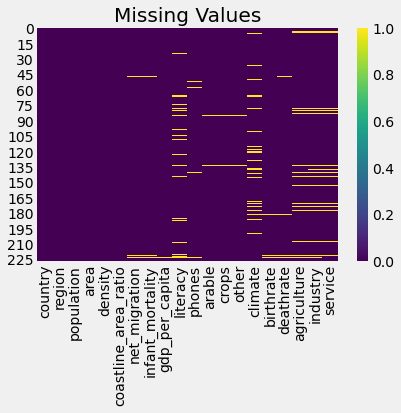

In [50]:
sns.heatmap(data.isnull(),cmap="viridis").set(title="Missing Values")

In [51]:
data['net_migration'].fillna(0, inplace=True)
data['infant_mortality'].fillna(0, inplace=True)
data['gdp_per_capita'].fillna(2500, inplace=True)
data['literacy'].fillna(data.groupby('region')['literacy'].transform('mean'), inplace= True)
data['phones'].fillna(data.groupby('region')['phones'].transform('mean'), inplace= True)
data['arable'].fillna(0, inplace=True)
data['crops'].fillna(0, inplace=True)
data['other'].fillna(0, inplace=True)
data['climate'].fillna(0, inplace=True)
data['birthrate'].fillna(data.groupby('region')['birthrate'].transform('mean'), inplace= True)
data['deathrate'].fillna(data.groupby('region')['deathrate'].transform('mean'), inplace= True)
data['agriculture'].fillna(0.17, inplace=True)
data['service'].fillna(0.8, inplace=True)
data['industry'].fillna((1 - data['agriculture'] - data['service']), inplace= True)

In [52]:
data.isnull().sum()

country                 0
region                  0
population              0
area                    0
density                 0
coastline_area_ratio    0
net_migration           0
infant_mortality        0
gdp_per_capita          0
literacy                0
phones                  0
arable                  0
crops                   0
other                   0
climate                 0
birthrate               0
deathrate               0
agriculture             0
industry                0
service                 0
dtype: int64

# EDA

Text(0.5, 1.0, 'Average GDP according to region')

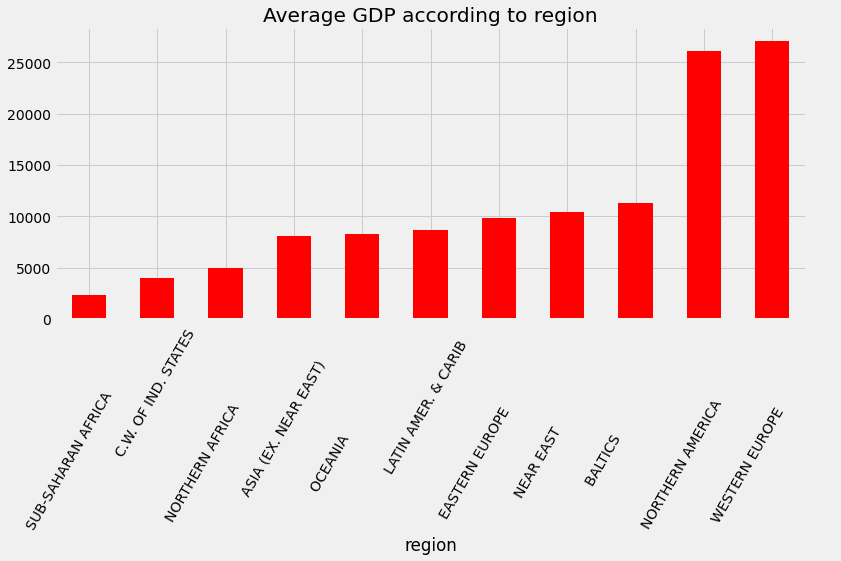

In [62]:
# AVERAGE GDP ACCORDING TO THE REGION
plt.figure(figsize=(12,5))
data.groupby('region')['gdp_per_capita'].mean().sort_values().plot(kind="bar",color="red")
plt.xticks(rotation=60)
plt.title("Average GDP according to region")

By this graph, we can tell that the WESTERN EUROPE region has the HIGHEST gdp per capita in the world and the SUB-SAHARA AFRICA has the LOWEST

[Text(0.5, 1.0, 'correlation between the features')]

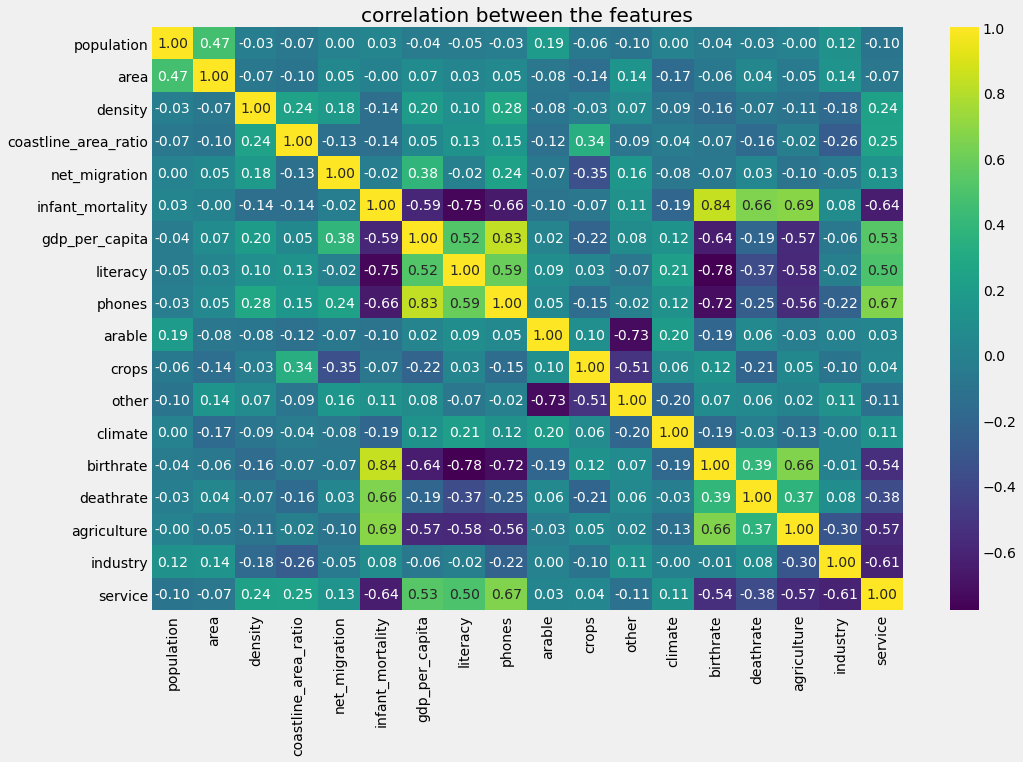

In [65]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True, fmt="0.2f",cmap="viridis").set(title="correlation between the features")

Some insights from the above coorelation map: <br>
1- strong positive correlation between gdp_per_capita and service <br>
2- strong positive correlation between gdp_per_capita and phones <br>
3- strong positive correlation between gdp_per_capita and literacy <br>
4- strong positive correlation between gdp_per_capita and net_migration <br>
5- strong negative correlation between gdp_per_capita and birhtrate <br>
6- service and literacy also have a strong correlation

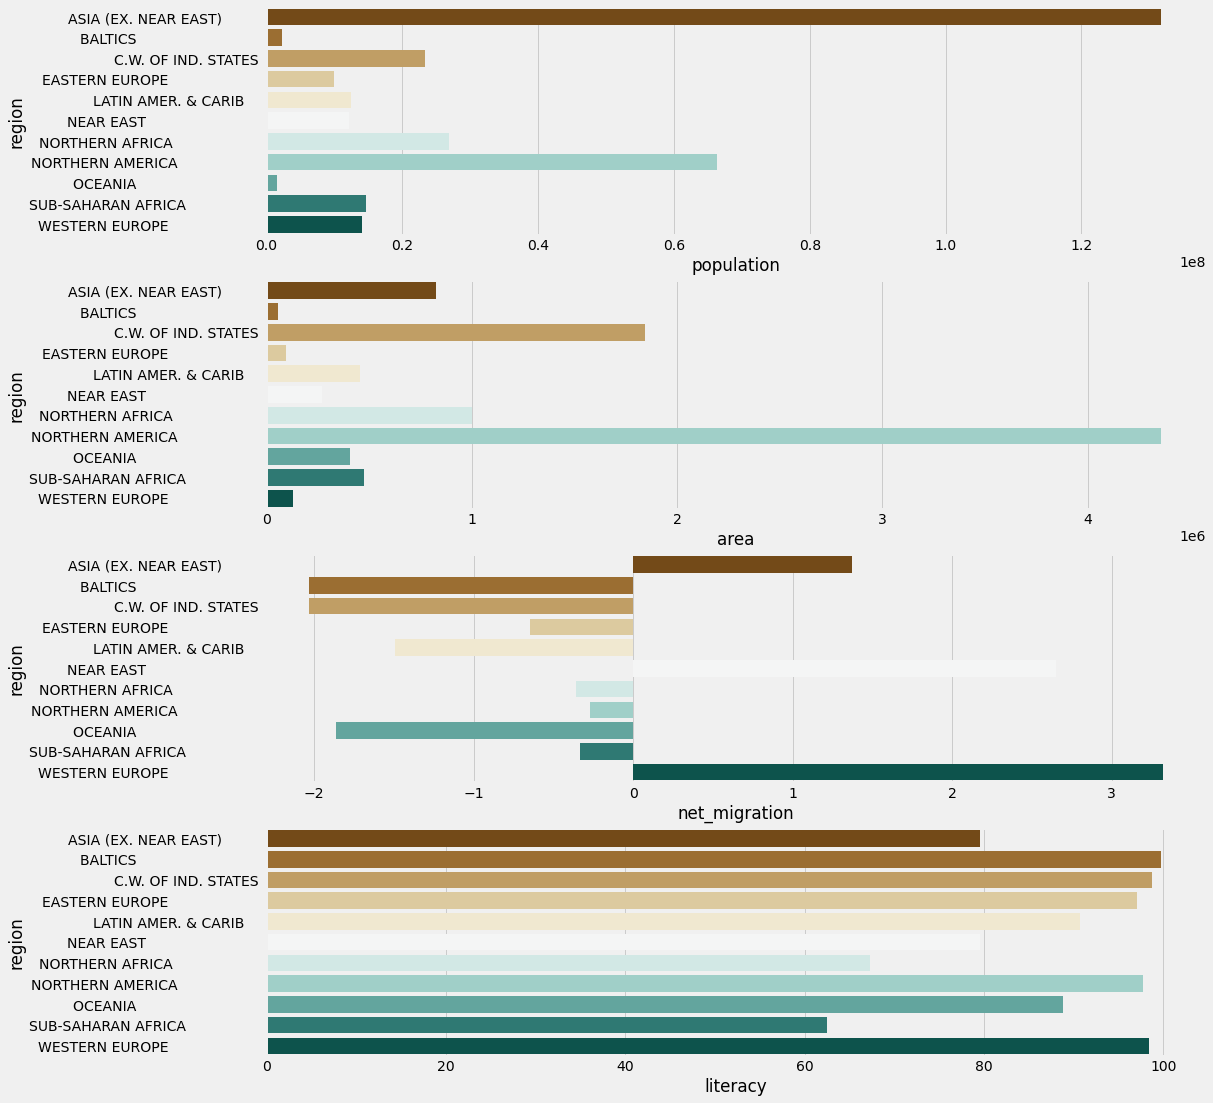

In [75]:
plt.subplots(4,1,figsize=(15,18))

cols=["population", "area", "net_migration", "literacy"]
for i in range(len(cols)):
    plt.subplot(4,1,i+1)
    sns.barplot(data=data, y="region", x=cols[i],palette='BrBG',ci=None)

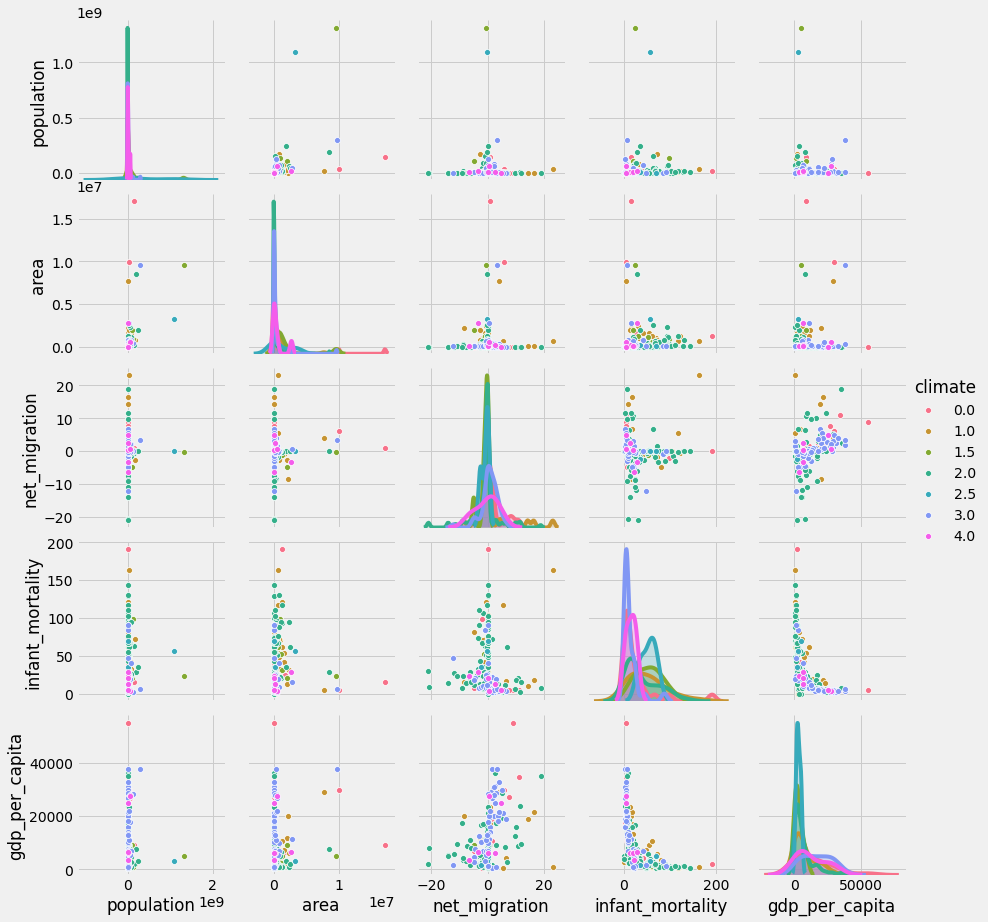

In [78]:
cols=['population', 'area', 'net_migration', "infant_mortality", "gdp_per_capita"]
sns.pairplot(vars=cols,data=data,hue="climate")

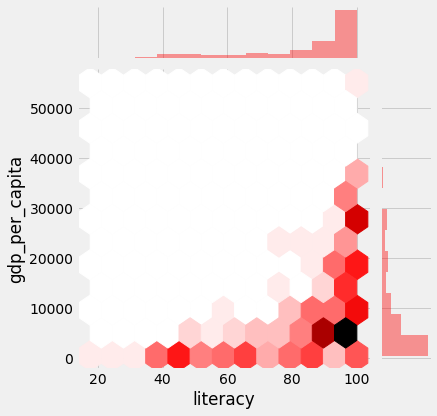

In [85]:
sns.jointplot(data=data, x="literacy", y="gdp_per_capita",kind="hex",color="red")


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

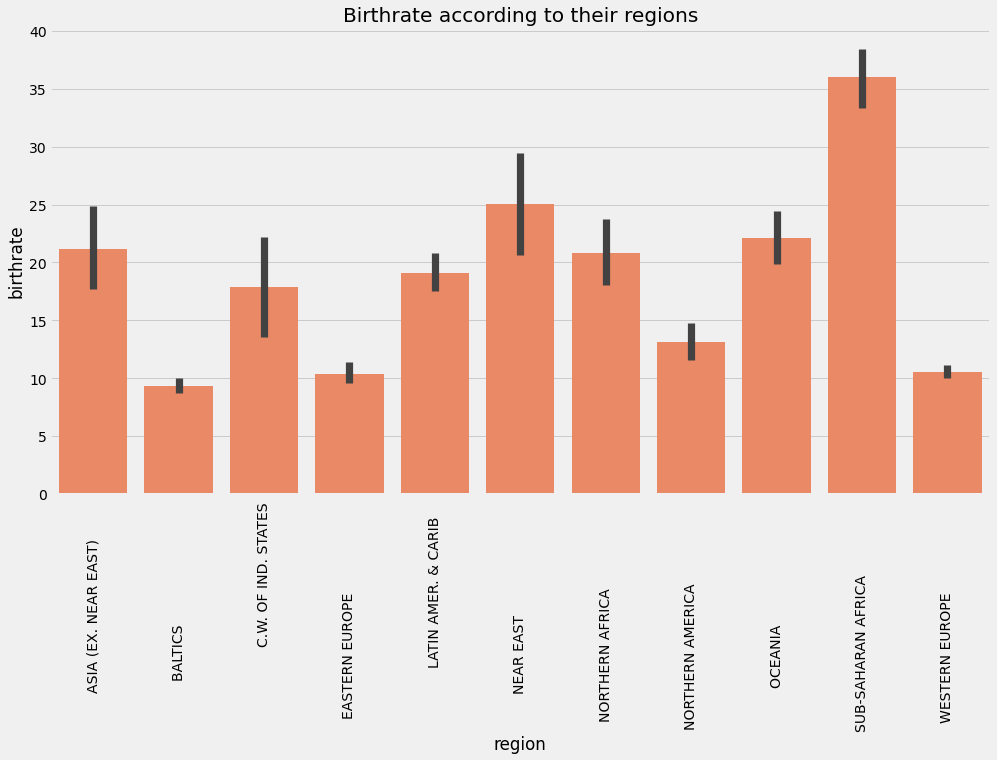

In [94]:
plt.figure(figsize=(15,8))
sns.barplot(x=data['region'], y=data['birthrate'], color="coral")
plt.title("Birthrate according to their regions")
plt.xticks(rotation=90)

In [90]:
data_final = pd.get_dummies(data,columns=['region'])

In [91]:
data_final.head()

,country,population,area,density,coastline_area_ratio,net_migration,infant_mortality,gdp_per_capita,literacy,phones,...,region_BALTICS,region_C.W. OF IND. STATES,region_EASTERN EUROPE,region_LATIN AMER. & CARIB,region_NEAR EAST,region_NORTHERN AFRICA,region_NORTHERN AMERICA,region_OCEANIA,region_SUB-SAHARAN AFRICA,region_WESTERN EUROPE
0,Afghanistan,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,...,0,0,0,0,0,0,0,0,0,0
1,Albania,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,...,0,0,1,0,0,0,0,0,0,0
2,Algeria,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,...,0,0,0,0,0,1,0,0,0,0
3,American Samoa,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,...,0,0,0,0,0,0,0,1,0,0
4,Andorra,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,...,0,0,0,0,0,0,0,0,0,1


In [92]:
x = data_final.drop(['country', 'gdp_per_capita'], axis=1)
y=data_final['gdp_per_capita']

#### Data Split 1: all of our final dataset, no scaling

In [93]:
from sklearn.model_selection import train_test_split, cross_val_score
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#### Data Split 2: all of our final dataset, with scaling¶

In [96]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x2_train = sc.fit_transform(x_train)
x2_test = sc.fit_transform(x_test)
y2_train = y_train
y2_test = y_test

#### Data Split 3: feature selected dataset, no scaling

We will select only a portion of our features, the ones with coreelation score larger than -/+ 0.3 with gdp_per_capita.


In [98]:
x3 = data_final.drop(['gdp_per_capita','country','population', 'area', 'coastline_area_ratio', 'arable',
                      'crops', 'other', 'climate', 'deathrate', 'industry'], axis=1)
y3=y

x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.2, random_state=42)


#### Data Split 4: feature selected dataset, with scaling¶


In [99]:
sc_x4 = StandardScaler()

x4_train = sc_x4.fit_transform(x3_train)
x4_test = sc_x4.fit_transform(x3_test)
y4_train = y3_train
y4_test = y3_test

## Linear Regression

In [100]:
from sklearn.linear_model import LinearRegression
lr1 = LinearRegression()
lr1.fit(x_train, y_train)

lr2 = LinearRegression()
lr2.fit(x2_train, y2_train)

lr3 = LinearRegression()
lr3.fit(x3_train, y3_train)

lr4 = LinearRegression()
lr4.fit(x4_train, y4_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predictions

In [103]:
lr1_pred = lr1.predict(x_test)
lr2_pred = lr2.predict(x2_test)
lr3_pred = lr3.predict(x3_test)
lr4_pred = lr4.predict(x4_test)

## Evaluations

Linear Regression Performance:

all features, No scaling:
MAE: 2673.363990556554
RMSE: 3470.873324929914
R2_Score:  0.8551273448237042

all features, with scaling:
MAE: 2901.681944492284
RMSE: 3684.888806171053
R2_Score:  0.8367107226693995

selected features, No scaling:
MAE: 2616.8505863879095
RMSE: 3351.4014620370804
R2_Score:  0.864929097408812

selected features, with scaling:
MAE: 2745.9475723030737
RMSE: 3551.998675908904
R2_Score:  0.8482759304545124


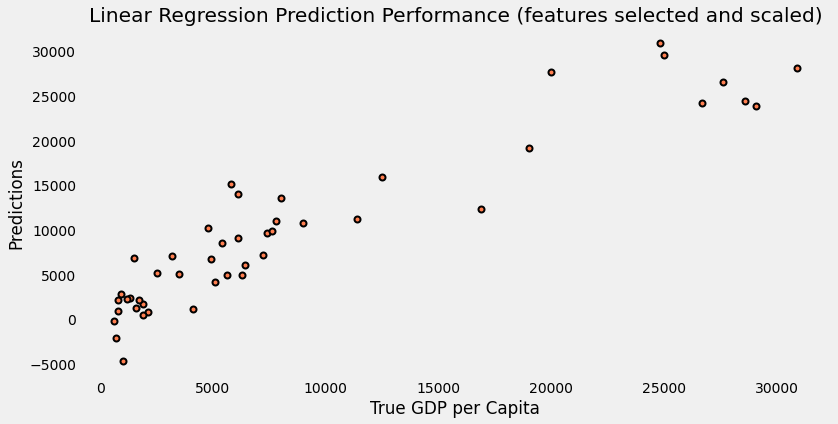

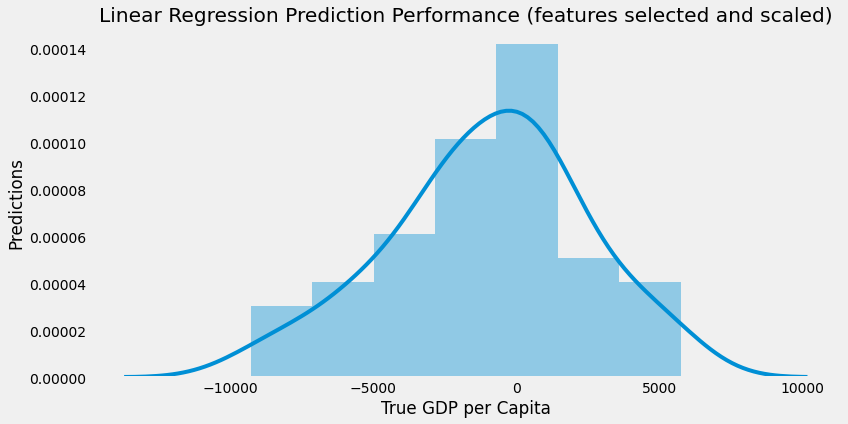

In [107]:
from sklearn import metrics 
print('Linear Regression Performance:')

print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, lr1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lr1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, lr1_pred))

print('\nall features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y2_test, lr2_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, lr2_pred)))
print('R2_Score: ', metrics.r2_score(y2_test, lr2_pred))

print('\nselected features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y3_test, lr3_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y3_test, lr3_pred)))
print('R2_Score: ', metrics.r2_score(y3_test, lr3_pred))

print('\nselected features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y4_test, lr4_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y4_test, lr4_pred)))
print('R2_Score: ', metrics.r2_score(y4_test, lr4_pred))

fig = plt.figure(figsize=(12, 6))
plt.scatter(y4_test,lr4_pred,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Linear Regression Prediction Performance (features selected and scaled)') 
plt.grid()
plt.show()

fig = plt.figure(figsize=(12, 6))
sns.distplot(y4_test - lr4_pred)
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Linear Regression Prediction Performance (features selected and scaled)') 
plt.grid()
plt.show()

Random Forest Regression Performance:

all features, No scaling:
MAE: 2063.804347826087
RMSE: 3173.2391659545337
R2_Score:  0.8789082642933002

all features, with scaling:
MAE: 2187.978260869565
RMSE: 3422.056237308842
R2_Score:  0.8591738919187627

selected features, No scaling:
MAE: 1962.1521739130435
RMSE: 2850.4526147079964
R2_Score:  0.9022905555553346

selected features, with scaling:
MAE: 2540.282608695652
RMSE: 3659.4072310428496
R2_Score:  0.838961255417443


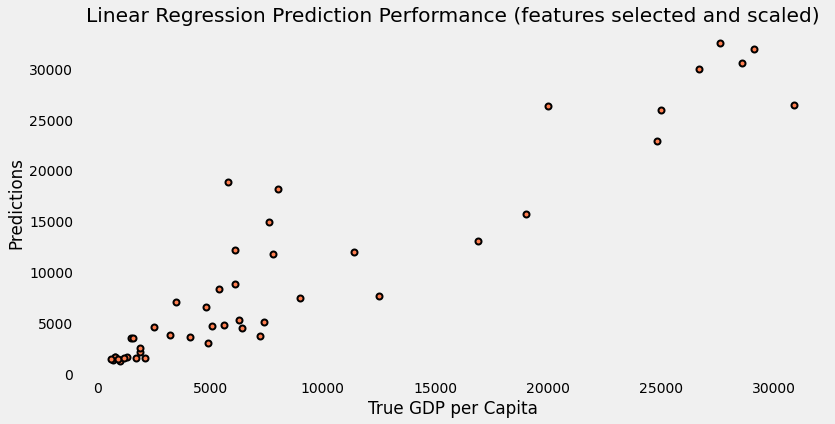

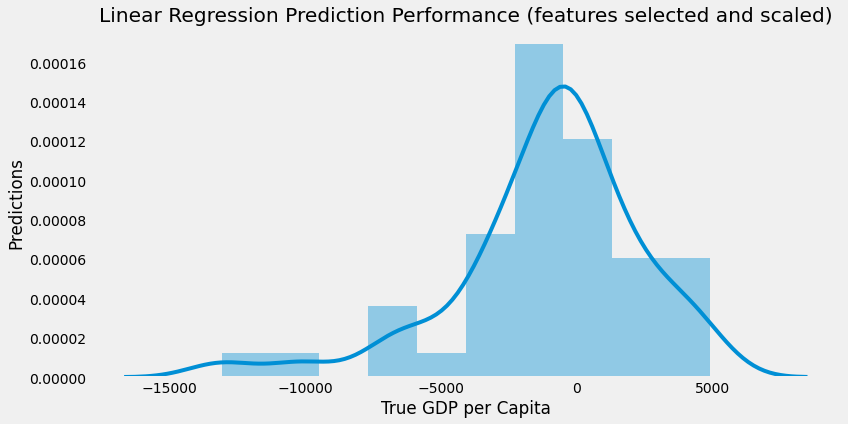

In [109]:
from sklearn.ensemble import RandomForestRegressor
rfr1 = RandomForestRegressor()
rfr1.fit(x_train, y_train)

rfr2 = RandomForestRegressor()
rfr2.fit(x2_train, y2_train)

rfr3 = RandomForestRegressor()
rfr3.fit(x3_train, y3_train)

rfr4 = RandomForestRegressor()
rfr4.fit(x4_train, y4_train)

rfr1_pred = rfr1.predict(x_test)
rfr2_pred = rfr2.predict(x2_test)
rfr3_pred = rfr3.predict(x3_test)
rfr4_pred = rfr4.predict(x4_test)

print('Random Forest Regression Performance:')

print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, rfr1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfr1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, rfr1_pred))

print('\nall features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y2_test, rfr2_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, rfr2_pred)))
print('R2_Score: ', metrics.r2_score(y2_test, rfr2_pred))

print('\nselected features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y3_test, rfr3_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y3_test, rfr3_pred)))
print('R2_Score: ', metrics.r2_score(y3_test, rfr3_pred))

print('\nselected features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y4_test, rfr4_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y4_test, rfr4_pred)))
print('R2_Score: ', metrics.r2_score(y4_test, rfr4_pred))

fig = plt.figure(figsize=(12, 6))
plt.scatter(y4_test,rfr4_pred,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Linear Regression Prediction Performance (features selected and scaled)') 
plt.grid()
plt.show()

fig = plt.figure(figsize=(12, 6))
sns.distplot(y4_test - rfr4_pred)
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Linear Regression Prediction Performance (features selected and scaled)') 
plt.grid()
plt.show()

[16:02:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Random Forest Regression Performance:

all features, No scaling:
MAE: 2245.8612418796706
RMSE: 3333.089836219429
R2_Score:  0.8664010850375488

all features, with scaling:
MAE: 2693.4954936815343
RMSE: 4117.777959061865
R2_Score:  0.796091776140381

selected features, No scaling:
MAE: 2108.4678066087804
RMSE: 2893.081181636068
R2_Score:  0.8993462098117004

selected features, with scaling:
MAE: 2819.7233090608015
RMSE: 4366.626777595034
R2_Score:  0.7707015918384537


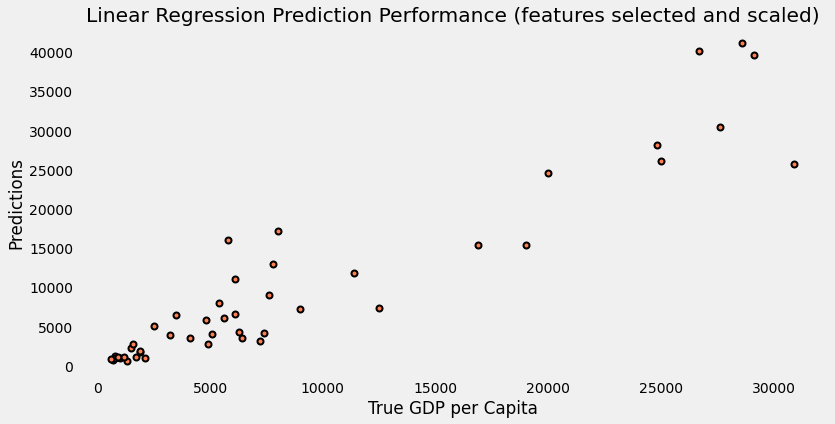

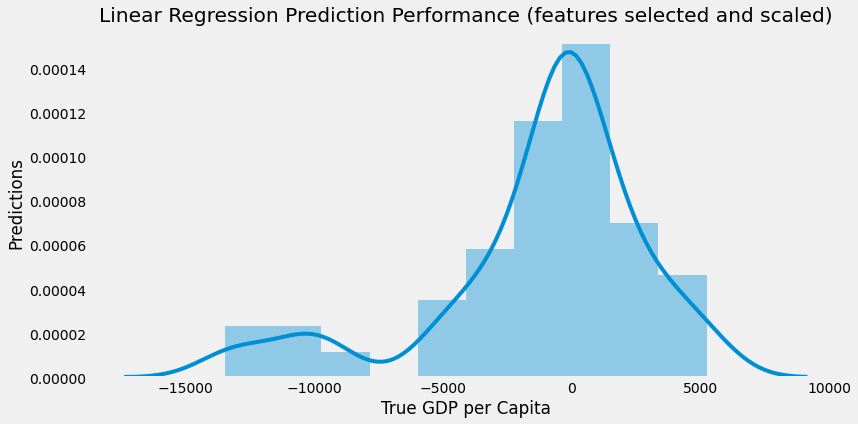

In [111]:
from xgboost import XGBRegressor
xgb1 = XGBRegressor()
xgb1.fit(x_train, y_train)

xgb2 = XGBRegressor()
xgb2.fit(x2_train, y2_train)

xgb3 = XGBRegressor()
xgb3.fit(x3_train, y3_train)

xgb4 = XGBRegressor()
xgb4.fit(x4_train, y4_train)

xgb1_pred = xgb1.predict(x_test)
xgb2_pred = xgb2.predict(x2_test)
xgb3_pred = xgb3.predict(x3_test)
xgb4_pred = xgb4.predict(x4_test)

print('Random Forest Regression Performance:')

print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, xgb1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, xgb1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, xgb1_pred))

print('\nall features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y2_test, xgb2_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, xgb2_pred)))
print('R2_Score: ', metrics.r2_score(y2_test, xgb2_pred))

print('\nselected features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y3_test, xgb3_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y3_test, xgb3_pred)))
print('R2_Score: ', metrics.r2_score(y3_test, xgb3_pred))

print('\nselected features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y4_test, xgb4_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y4_test, xgb4_pred)))
print('R2_Score: ', metrics.r2_score(y4_test, xgb4_pred))

fig = plt.figure(figsize=(12, 6))
plt.scatter(y4_test,xgb4_pred,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Linear Regression Prediction Performance (features selected and scaled)') 
plt.grid()
plt.show()

fig = plt.figure(figsize=(12, 6))
sns.distplot(y4_test -xgb4_pred)
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Linear Regression Prediction Performance (features selected and scaled)') 
plt.grid()
plt.show()

### We get the best accuracy of 91% in random forest with selected features and without scaling. So, we further try to increase the accuracy of hyper-optimizing the parameters


### Optimization

We will use grid search in order to obtain good parameters for our RF regressor. Of course our optimization here will be limited due to time and computing power constraints. The parameters we will optimiz are:

    n-estimators
    min_samples_leaf
    max_features
    bootstrap



In [112]:
rf_param_grid = {'max_features': ['sqrt', 'auto'],
              'min_samples_leaf': [1, 3, 5],
              'n_estimators': [100, 500, 1000],
             'bootstrap': [False, True]}

In [113]:
from sklearn.model_selection import GridSearchCV
rf_grid = GridSearchCV(estimator= RandomForestRegressor(), param_grid = rf_param_grid,  n_jobs=-1, verbose=0)


In [115]:
rf_grid.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

In [117]:
rf_grid_predictions = rf_grid.predict(x_test)
print('R2_Score: ', metrics.r2_score(y_test, rf_grid_predictions))

R2_Score:  0.9248912657625789


In [120]:
rf1_grid = GridSearchCV(estimator= RandomForestRegressor(), param_grid = rf_param_grid,  n_jobs=-1, verbose=0)
rf1_grid.fit(x3_train,y3_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

In [123]:
rf1_grid_predictions = rf1_grid.predict(x3_test)
print('MAE:', metrics.mean_absolute_error(y3_test, rf1_grid_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y3_test, rf1_grid_predictions)))
print('R2_Score: ', metrics.r2_score(y3_test, rf1_grid_predictions))

MAE: 1836.7804347826088
RMSE: 2602.8403344690837
R2_Score:  0.9185288308697308


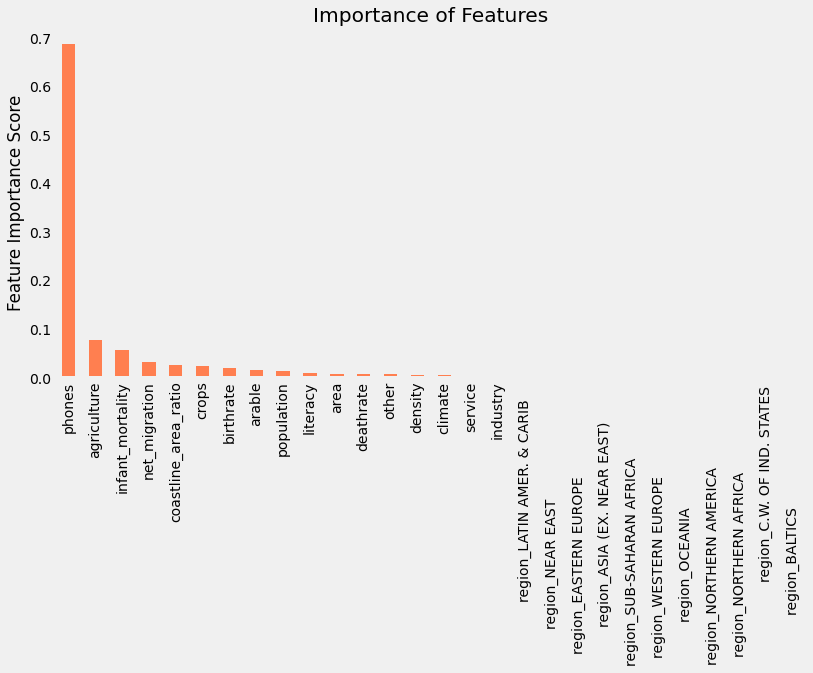

In [122]:
feat_imp = pd.Series(rfr1.feature_importances_, list(x_train)).sort_values(ascending=False)
fig = plt.figure(figsize=(12, 6))
feat_imp.plot(kind='bar', title='Importance of Features', color= 'coral')
plt.ylabel('Feature Importance Score')
plt.grid()
plt.show()


## Conclusion

In this project, we used countries_of_the_world dataset to build a GDP predictor. 3 different learning regressors (Linear Regression, Random Forest, and XGBoost) were tested, and we have acheived the best prediction performance using Random Forest, followed by XGBoost, and then Linear Regression
The best prediction performance was acheived using Random Forest regressor, using all features in the dataset, and resulted in the following metrics:

MAE: 1836.7804347826088
RMSE: 2602.8403344690837
R2_Score:  0.9185288308697308

Taking into account that the gdp_per_capita values in the dataset ranges from 500 to 55100 USD.
